In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import pad_sequences
from sklearn.metrics import precision_score, recall_score, f1_score

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.shape

(24783, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


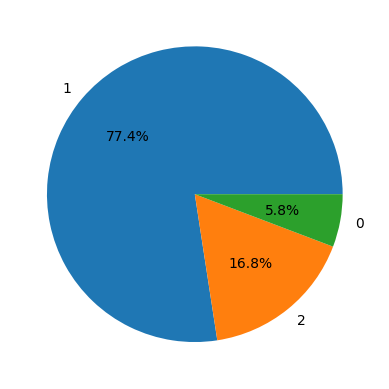

In [5]:
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()

In [6]:
# Defining a function to clean a single tweet
def clean_tweet(tweet):
    # Removing @mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Removing extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Applying the function to the 'tweet' column
df['tweet'] = df['tweet'].apply(clean_tweet)

# Displaying a sample of the cleaned tweets
df[['tweet']].head()


,tweet
0,!!! RT : As a woman you shouldn't complain abo...
1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...
3,!!!!!!!!! RT : she look like a tranny
4,!!!!!!!!!!!!! RT : The shit you hear about me ...


In [7]:
import string

# Defining a function to remove punctuations from a tweet
def remove_punctuations(tweet):
    return tweet.translate(str.maketrans('', '', string.punctuation))

# Applying the function to the 'tweet' column
df['tweet'] = df['tweet'].apply(remove_punctuations)

# Displaying a sample of cleaned tweets
df[['tweet']].head()

,tweet
0,RT As a woman you shouldnt complain about cl...
1,RT boy dats coldtyga dwn bad for cuffin dat ...
2,RT Dawg RT You ever fuck a bitch and she sta...
3,RT she look like a tranny
4,RT The shit you hear about me might be true ...


In [8]:
# Defining a function to clean numbers and URLs from a tweet
def remove_numbers_and_urls(tweet):
    # Removing URLs
    tweet = re.sub(r'http\S+|www\S+', '', tweet)
    # Removing numbers
    tweet = re.sub(r'\d+', '', tweet)
    # Removing extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Applying the function to the 'tweet' column
df['tweet'] = df['tweet'].apply(remove_numbers_and_urls)

# Displaying a sample of cleaned tweets
df[['tweet']].head()

,tweet
0,RT As a woman you shouldnt complain about clea...
1,RT boy dats coldtyga dwn bad for cuffin dat ho...
2,RT Dawg RT You ever fuck a bitch and she start...
3,RT she look like a tranny
4,RT The shit you hear about me might be true or...


In [9]:
df.to_csv("file_1.csv")

In [10]:
df.head()

,class,tweet
0,2,RT As a woman you shouldnt complain about clea...
1,1,RT boy dats coldtyga dwn bad for cuffin dat ho...
2,1,RT Dawg RT You ever fuck a bitch and she start...
3,1,RT she look like a tranny
4,1,RT The shit you hear about me might be true or...


In [11]:
#Removing stop words
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():

		if word not in stop_words:

			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)

			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,class,tweet
0,2,RT As woman shouldnt complain cleaning house a...
1,1,RT boy dats coldtyga dwn bad cuffin dat hoe st...
2,1,RT Dawg RT You ever fuck bitch start cry You c...
3,1,RT look like tranny
4,1,RT The shit hear might true might faker bitch ...


In [12]:
# Lower case all the words of the tweet
df['tweet'] = df['tweet'].str.lower()
df.head()

,class,tweet
0,2,rt as woman shouldnt complain cleaning house a...
1,1,rt boy dats coldtyga dwn bad cuffin dat hoe st...
2,1,rt dawg rt you ever fuck bitch start cry you c...
3,1,rt look like tranny
4,1,rt the shit hear might true might faker bitch ...


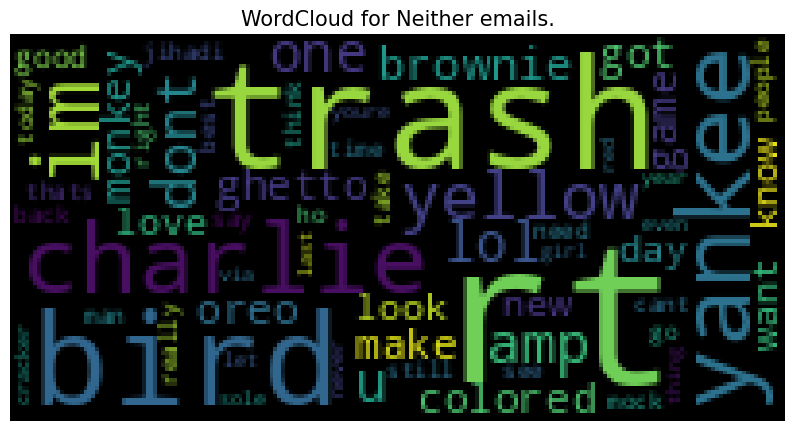

In [13]:
#Plotiing a word-cloud
def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])

  plt.figure(figsize = (10,10))

  # Forming the word cloud
  wc = WordCloud(max_words = 200,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==2], typ='Neither')

In [14]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)

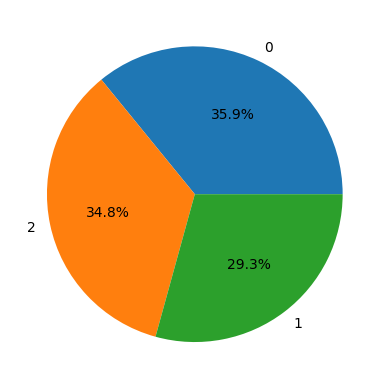

In [15]:
plt.pie(balanced_df['class'].value_counts().values,
		labels=balanced_df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()

In [16]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size=0.2,
												random_state=22)
X_train.shape, X_val.shape

((9562,), (2391,))

In [17]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((9562, 3), (2391, 3))

In [18]:
max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
				lower=True,
				split=' ')

token.fit_on_texts(X_train)

In [19]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
				lower=True,
				split=' ')
token.fit_on_texts(X_train)

#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
							maxlen=50,
							padding='post',
							truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
							maxlen=50,
							padding='post',
							truncating='post')

In [20]:
model = keras.models.Sequential([
	layers.Embedding(max_words, 32, input_length=max_len),
	layers.Bidirectional(layers.LSTM(64)),
	layers.Dense(512, activation='relu', kernel_regularizer='l1'),
	layers.BatchNormalization(),
	layers.Dropout(0.3),
	layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

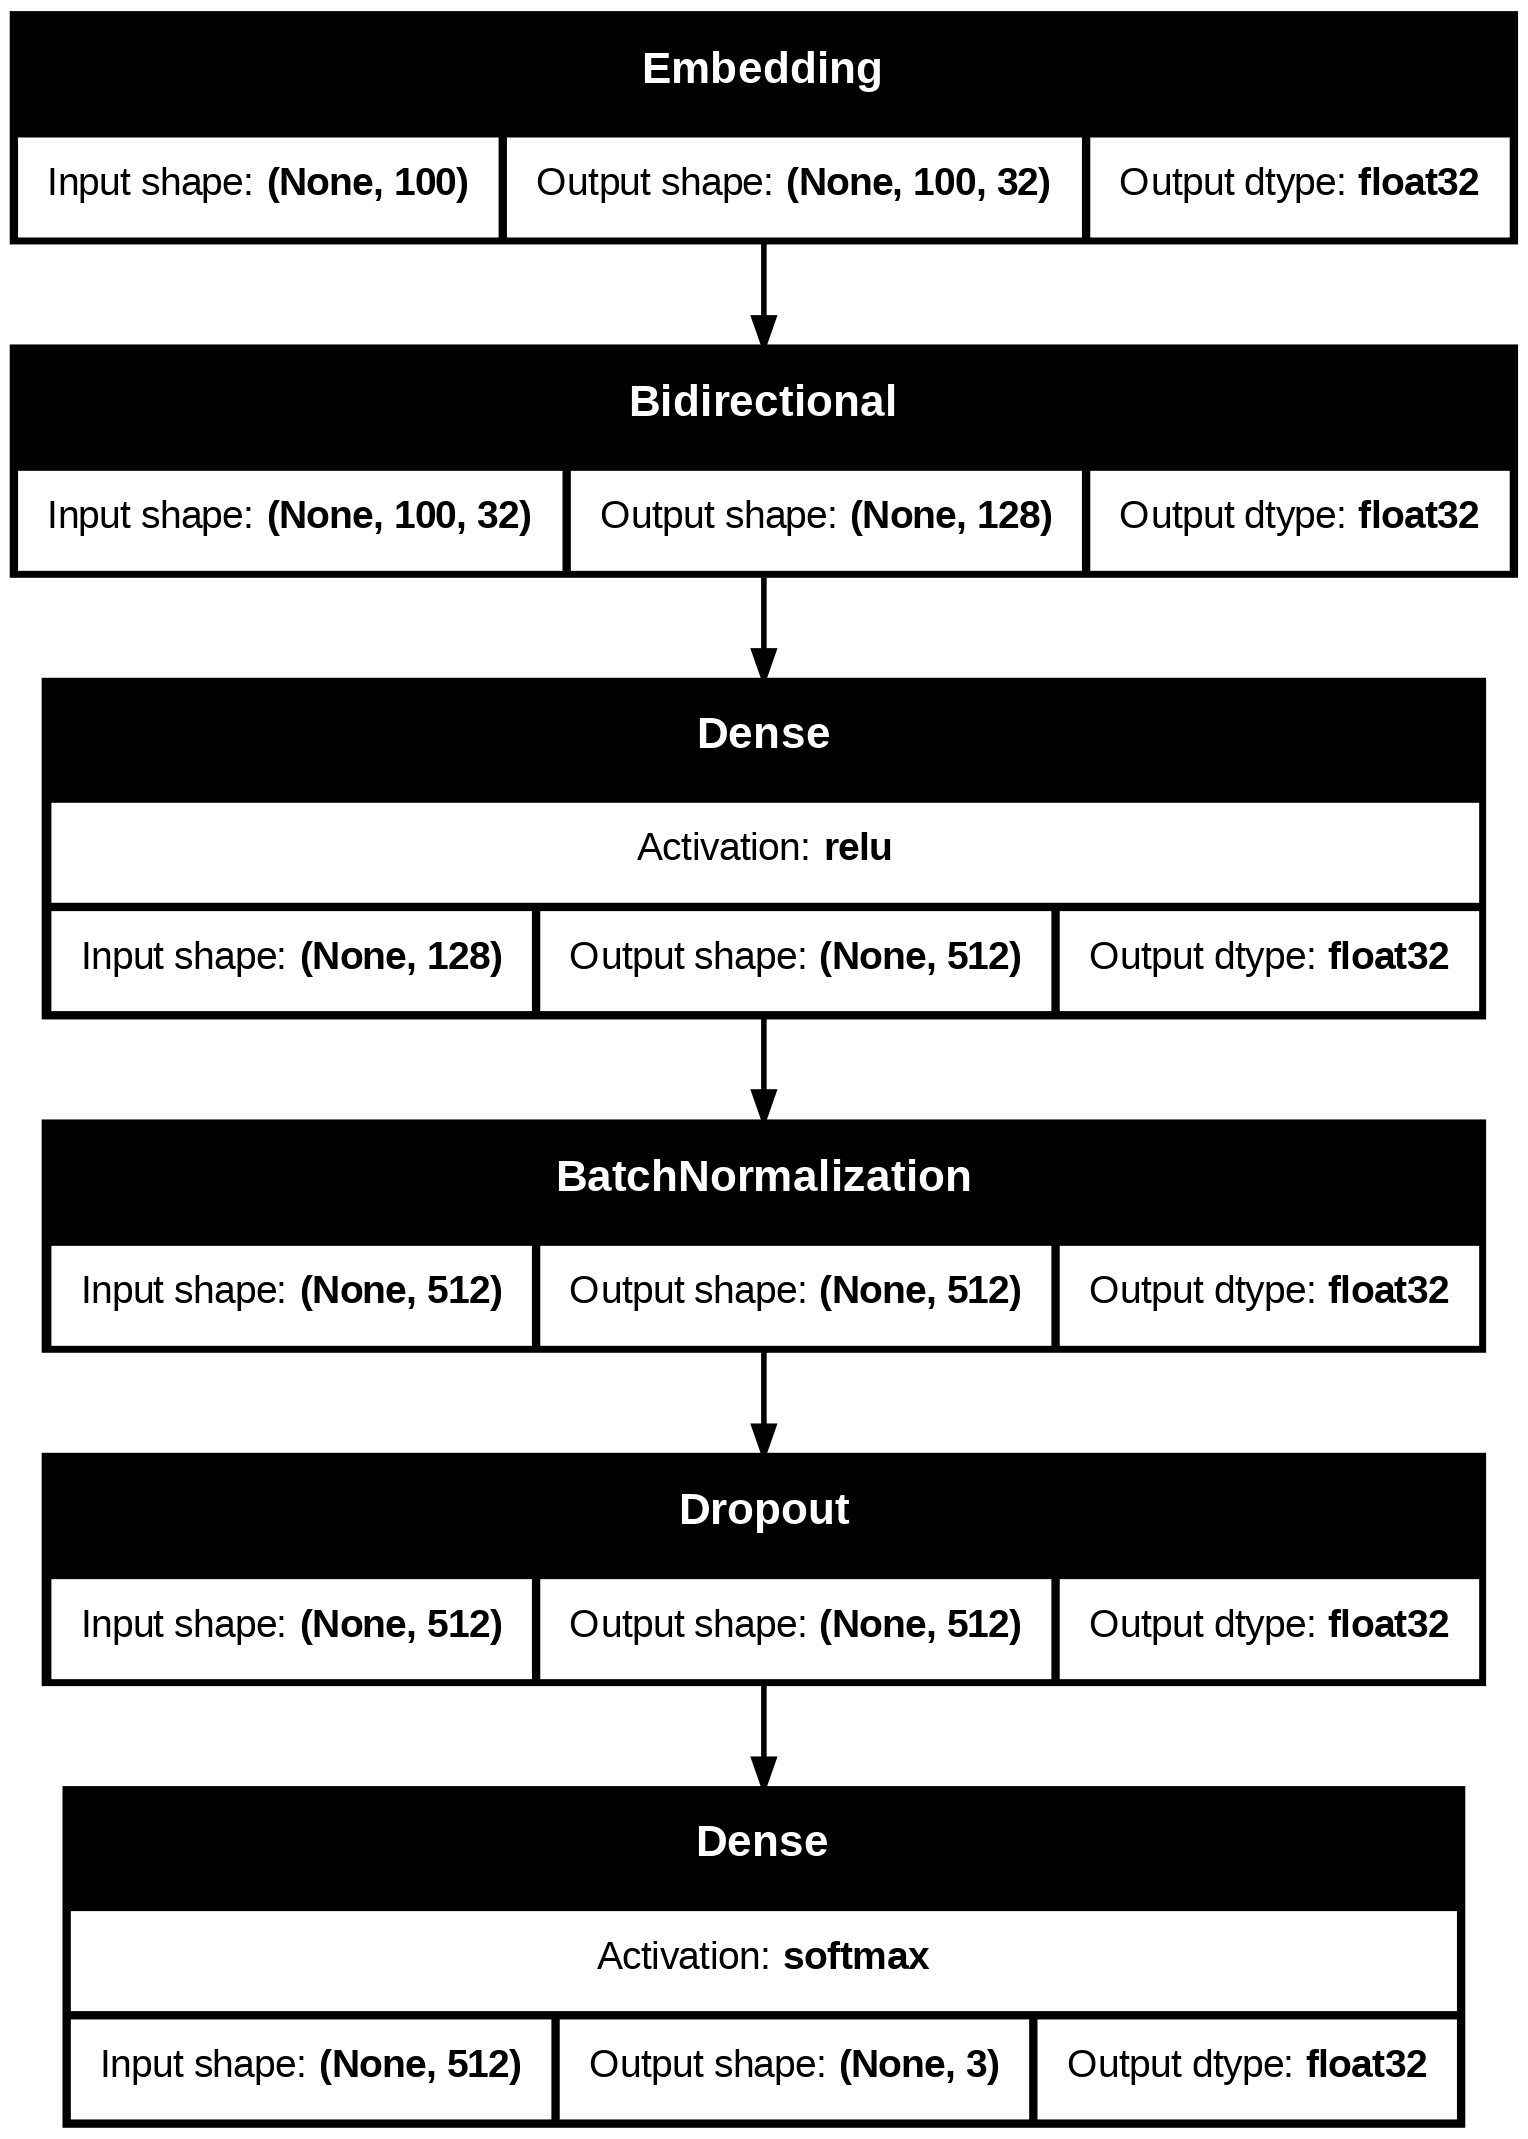

In [21]:
# Add a dummy input to build the model
model.build((None, max_len))

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

'''es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)'''

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)

In [23]:
# Instantiate Tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences for uniform length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len)

# Custom callback to calculate precision, recall, and F1-score
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_predictions = np.argmax(self.model.predict(X_val_padded), axis=1)
        val_true = np.argmax(Y_val, axis=1)

        precision = precision_score(val_true, val_predictions, average='weighted')
        recall = recall_score(val_true, val_predictions, average='weighted')
        f1 = f1_score(val_true, val_predictions, average='weighted')

        print(f" - val_precision: {precision:.4f} - val_recall: {recall:.4f} - val_f1_score: {f1:.4f}")
        logs.update({'val_precision': precision, 'val_recall': recall, 'val_f1_score': f1})

# Add metrics callback
metrics_callback = MetricsCallback()

# Train the model
history = model.fit(
    X_train_padded, Y_train,
    validation_data=(X_val_padded, Y_val),
    epochs=50,
    verbose=1,
    batch_size=32,
    callbacks=[lr, metrics_callback]
)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
 - val_precision: 0.7997 - val_recall: 0.6909 - val_f1_score: 0.6921
299/299 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.6612 - loss: 11.2878 - val_accuracy: 0.6909 - val_loss: 1.0571 - learning_rate: 0.0010 - val_precision: 0.7997 - val_recall: 0.6909 - val_f1_score: 0.6921
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 - val_precision: 0.8567 - val_recall: 0.8419 - val_f1_score: 0.8378
299/299 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9038 - loss: 0.4614 - val_accuracy: 0.8419 - val_loss: 0.6245 - learning_rate: 0.0010 - val_precision: 0.8567 - val_recall: 0.8419 - val_f1_score: 0.8378
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 - val_precision: 0.8638 - val_recall: 0.8348 - val_f1_score: 0.8275
299/299 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9288 - loss: 0.3566 - val_accuracy: 0.8348 - val_loss: 0.6191 - learning_rate: 0.0010 - val_precision: 0.8638 - val_recall: 0.8348 - val_f1_score: 0.8275
Epoch 4/50


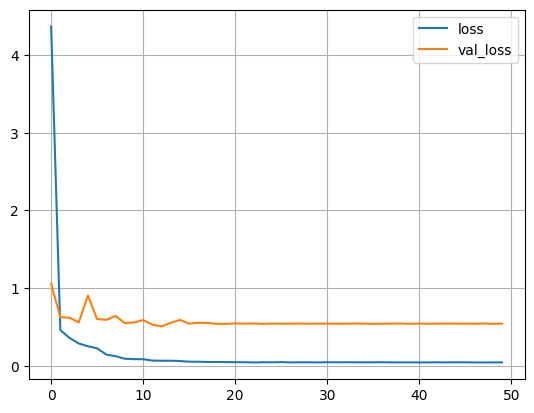

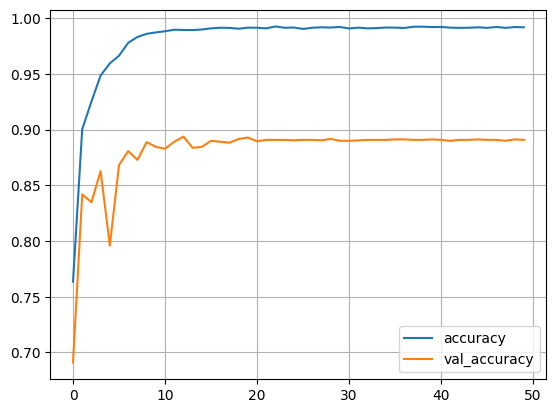

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.grid()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.grid()
plt.show()

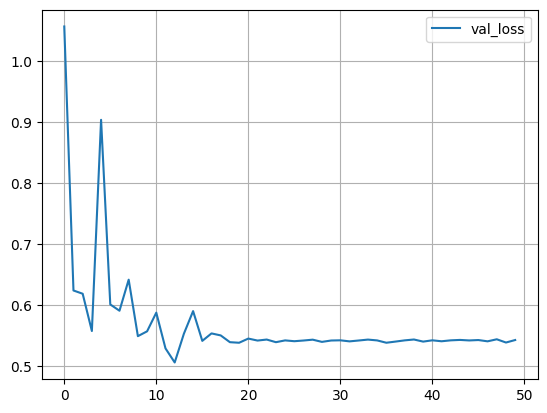

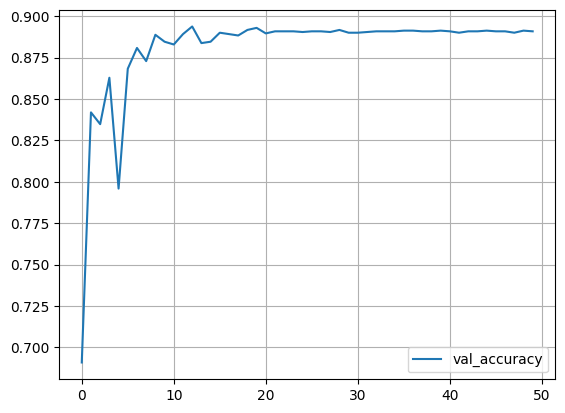

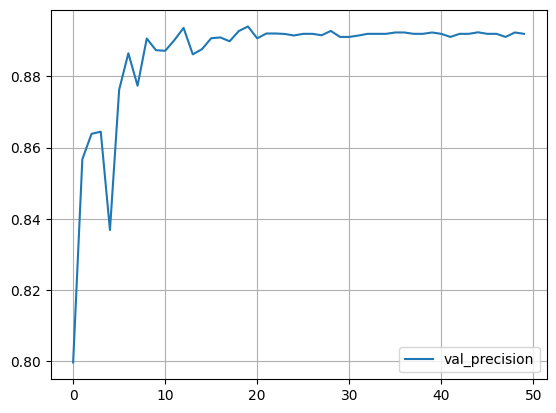

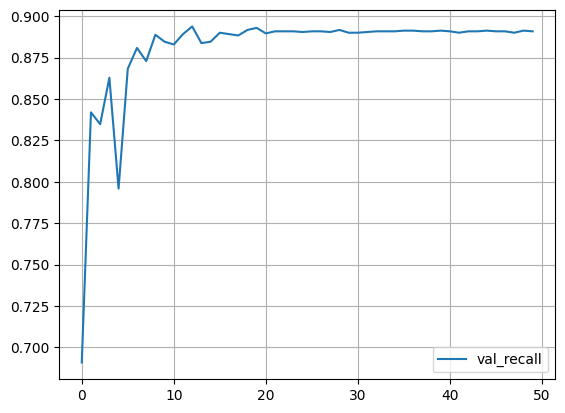

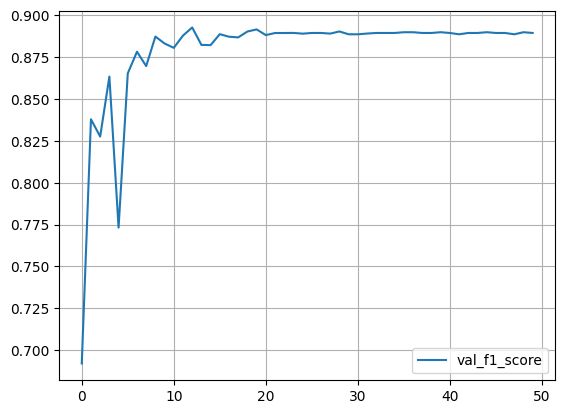

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['val_loss']].plot()
plt.grid()
history_df.loc[:, ['val_accuracy']].plot()
plt.grid()
history_df.loc[:, ['val_precision']].plot()
plt.grid()
history_df.loc[:, ['val_recall']].plot()
plt.grid()
history_df.loc[:, ['val_f1_score']].plot()
plt.grid()
plt.show()

In [26]:
print(history_df['val_accuracy'].mean())

0.8806022560596466


In [27]:
model.save('rnn_lstm_model.keras')